In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import networkx as nx
import tweepy
import pickle
import IPython.display as dp
import urllib.request
import io
from PIL import Image
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [9]:
with open('data/edges.bin', 'rb') as fp:
    edges = pickle.loads(fp.read())

with open('data/visited.bin', 'rb') as fp:
    visited = pickle.loads(fp.read())

with open('data/crawl_frontier.bin', 'rb') as fp:
    crawl_frontier = pickle.loads(fp.read())

In [3]:
g = nx.from_edgelist(edges)
ranks = nx.pagerank(g)

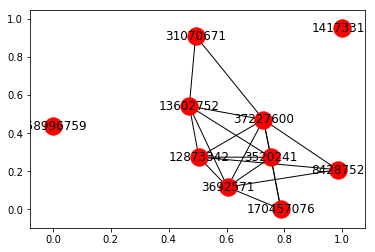

In [4]:
ranked = list(sorted(ranks, key=ranks.get, reverse=True))
g.remove_nodes_from(ranked[10:])
nx.draw_networkx(g)

In [5]:
import config
auth = tweepy.OAuthHandler(config.consumer_key, config.consumer_secret)
auth.set_access_token(config.access_token_key, config.access_token_secret)
api = tweepy.API(auth)

In [6]:
for user_id in g.nodes():
    status = api.get_user(user_id)
    file = io.BytesIO(urllib.request.urlopen(status.profile_image_url).read())
    g.node[user_id]['image']= Image.open(file)
    g.node[user_id]['image_url'] = status.profile_image_url

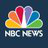

In [7]:
g.node[g.nodes()[0]]['image']

In [8]:
# pos = nx.spring_layout(g)
pos = nx.circular_layout(g)

Xv = [v[0] for v in pos.values()]
Yv = [v[1] for v in pos.values()]
Xed = np.array([[pos[edge[0]][0], pos[edge[1]][0]] for edge in g.edges()]).flatten()
Yed = np.array([[pos[edge[0]][1], pos[edge[1]][1]] for edge in g.edges()]).flatten()
labels = g.nodes()

trace1=go.Scatter(x=Xed,
                  y=Yed,
                  mode='lines',
                  line=go.Line(width=0.5,color='#888'),
                  name='follow',
                  hoverinfo='none'
)
trace2=go.Scatter(x=Xv,
                  y=Yv,
                  mode='markers',
                  name='users',
                  marker=go.Marker(symbol='dot', color='red', size=20),
                  text=labels,
                  hoverinfo='text'
)

images = [{"source": g.node[user_id]['image_url'], 
           "x": pos[user_id][0]/2.3 + 0.48, 
           "y": pos[user_id][1]/2.3 + 0.55, 
           "sizex": 0.1, 
           "sizey": 0.1,
           } for user_id in g.nodes()]
        
layout= go.Layout(images=images)
fig=go.Figure(data=[trace1, trace2], layout=layout)
plotly.offline.iplot(fig)